In [1]:
from main import Solver
import torch
from synth_data import create_synthData_new, create_synthData_multi
from validation_method import FS_MCC
import numpy as np

In [2]:
# Hyper Params Section
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using", torch.cuda.device_count(), "GPUs")

Solver = Solver(device)
## Evaluation params
ACC_list = []
FS_list = []
MCC_list = []


Using 0 GPUs


In [7]:
## Scenario 1
FS = []
MCC = []
ACC = []
N = 400
views = create_synthData_new(N, mode=1, F=20)    
print(f'input views shape :')
for i, view in enumerate(views):
    print(f'view_{i} :  {view.shape}')
    view = view.to("cpu")
    
## train hyper

#b0, obj = Solver.tune_hyper(x_list=views, set_params=1,max_params=50,iters=100)
#print(b0)
b0=1
print("SNGCCA Started!")
for rep in range(1):
    if (rep + 1) % 100 == 0:
        print("REP=", rep + 1)
    
    ## fit results
    u = Solver._get_outputs(views, 1e-7, 200, (b0,b0,b0))

    Label = torch.cat([torch.ones(2, dtype=torch.bool), torch.zeros(18, dtype=torch.bool)])
    acc,f1,mcc = FS_MCC(u, Label)
    ACC.append(acc)
    FS.append(f1)
    MCC.append(mcc)

input views shape :
view_0 :  torch.Size([400, 20])
view_1 :  torch.Size([400, 20])
view_2 :  torch.Size([400, 20])
SNGCCA Started!


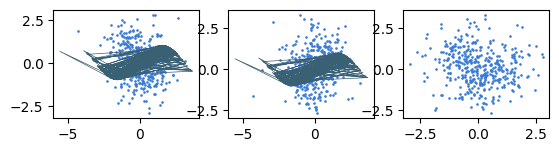

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)

x1 = views[0] @ u[0]
xg1 = views[0][:,0] + views[0][:,1]
y1 = views[1] @ u[1]
yg1 = views[1][:,0] + views[1][:,1]
z1 = views[2] @ u[2]
zg1 = views[2][:,0] + views[2][:,1]

ax1.scatter(x1,y1,s=0.8,c='#3a7bd5')
ax1.plot(xg1,yg1,linewidth=0.5,c='#3a6073')
ax2.scatter(x1,z1,s=0.8,c='#3a7bd5')
ax2.plot(xg1,yg1,linewidth=0.5,c='#3a6073')
ax3.scatter(y1,z1,s=0.8,c='#3a7bd5')
#ax3.plot(yg1,zg1,linewidth=0.5,c='#3a6073')

In [8]:
macc = np.mean(ACC)
sdacc = np.std(ACC)
print(macc, sdacc)
ACC_list.append([macc,sdacc])

mf = np.mean(FS)
sdf = np.std(FS)
print(mf, sdf)
FS_list.append([mf,sdf])

mmcc = np.mean(MCC)
sdmcc = np.std(MCC)
print(mmcc, sdmcc)
MCC_list.append([mmcc, sdmcc])

0.9975999999999999 0.00639583197611279
0.9890549450549452 0.02889918516206012
0.9882629549372325 0.030909214124223112


In [7]:
## Scenario 2
from validation_method import FS_MCC
ACC_2 = []
FS_2 = []
MCC_2 = []
N = 400
views = create_synthData_new(N, mode=2, F=20)

print(f'input views shape :')
for i, view in enumerate(views):
    print(f'view_{i} :  {view.shape}')
    view = view.to("cpu")

## train hyper
#b0, obj = Solver.tune_hyper(x_list=views, set_params=10,max_params=50,iters=100)
#print(b0)
b0 = 14
for rep in range(1):
    if (rep + 1) % 100 == 0:
        print("REP=", rep + 1)
    
    ## fit results
    u = Solver._get_outputs(views, 1e-7, 300, (b0,b0,b0))

    Label = torch.cat([torch.ones(2, dtype=torch.bool), torch.zeros(18, dtype=torch.bool)])
    acc,f1,mcc = FS_MCC(u, Label)
    ACC_2.append(acc)
    FS_2.append(f1)
    MCC_2.append(mcc)
print(u)

input views shape :
view_0 :  torch.Size([400, 20])
view_1 :  torch.Size([400, 20])
view_2 :  torch.Size([400, 20])
[tensor([[ 0.6972],
        [ 0.7114],
        [-0.0201],
        [ 0.0029],
        [-0.0011],
        [ 0.0509],
        [-0.0017],
        [ 0.0086],
        [-0.0117],
        [-0.0101],
        [-0.0282],
        [ 0.0135],
        [-0.0012],
        [ 0.0174],
        [-0.0210],
        [ 0.0217],
        [-0.0194],
        [ 0.0087],
        [ 0.0419],
        [ 0.0103]]), tensor([[ 7.2292e-01],
        [ 6.8948e-01],
        [-3.5069e-03],
        [-2.2646e-03],
        [ 7.3474e-03],
        [ 2.1982e-02],
        [-6.9508e-03],
        [-4.0742e-03],
        [ 7.7267e-03],
        [-5.6337e-03],
        [-5.1001e-03],
        [ 1.7660e-02],
        [-5.2956e-06],
        [-8.3810e-03],
        [-5.3433e-04],
        [-2.9984e-03],
        [-2.7579e-03],
        [ 1.7904e-02],
        [-2.0869e-02],
        [ 1.0752e-02]]), tensor([[ 0.0612],
        [ 0.1132],
 

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
print(u)
x2 = views[0] @ u[0]
xg2 = views[0][:,0] + views[0][:,1]
y2 = views[1] @ u[1]
yg2 = views[1][:,0] + views[1][:,1]
z2 = views[2] @ u[2]
zg2 = views[2][:,0] + views[2][:,1]

ax1.scatter(x1,y1,s=0.8,c='#3a7bd5')
ax1.plot(xg1,yg1,linewidth=0.5,c='#3a6073')
ax2.scatter(x1,z1,s=0.8,c='#3a7bd5')
ax2.plot(xg1,yg1,linewidth=0.5,c='#3a6073')
ax3.scatter(y1,z1,s=0.8,c='#3a7bd5')
#ax3.plot(yg1,zg1,linewidth=0.5,c='#3a6073')
ax4.scatter(x2,y2,s=0.8,c='#3a7bd5')
ax4.plot(xg2,yg2,linewidth=0.5,c='#3a6073')
ax5.scatter(x2,z2,s=0.8,c='#3a7bd5')
ax5.plot(xg2,yg2,linewidth=0.5,c='#3a6073')
ax6.scatter(y2,z2,s=0.8,c='#3a7bd5')
#ax6.plot(yg1,zg1,linewidth=0.5,c='#3a6073')


NameError: name 'plt' is not defined

In [10]:
macc = np.mean(ACC_2)
sdacc = np.std(ACC_2)
print(macc, sdacc)
ACC_list.append([macc,sdacc])

mf = np.mean(FS_2)
sdf = np.std(FS_2)
print(mf, sdf)
FS_list.append([mf,sdf])

mmcc = np.mean(MCC_2)
sdmcc = np.std(MCC_2)
print(mmcc, sdmcc)
MCC_list.append([mmcc, sdmcc])

0.9434999999999999 0.14647515906194547
0.8933763128080017 0.2738150324505891
0.8753058894507663 0.323405773174309


In [7]:
## Scenario 3
FS_3 = []
MCC_3 = []
ACC_3 = []
N = 400
views = create_synthData_new(N, mode=3, F=20)

print(f'input views shape :')
for i, view in enumerate(views):
    print(f'view_{i} :  {view.shape}')
    view = view.to("cpu")

## train hyper
#b0, obj = Solver.tune_hyper(x_list=views, set_params=10,max_params=50,iters=100)
#print(b0)
b0=5.00
for rep in range(1):
    if (rep + 1) % 100 == 0:
        print("REP=", rep + 1)

    ## fit results
    u = Solver._get_outputs(views, 1e-7, 200, (b0,b0,b0))

    Label = torch.cat([torch.ones(2, dtype=torch.bool), torch.zeros(18, dtype=torch.bool)])
    acc,f1,mcc = FS_MCC(u, Label)
    ACC_3.append(acc)
    FS_3.append(f1)
    MCC_3.append(mcc)


input views shape :
view_0 :  torch.Size([400, 20])
view_1 :  torch.Size([400, 20])
view_2 :  torch.Size([400, 20])


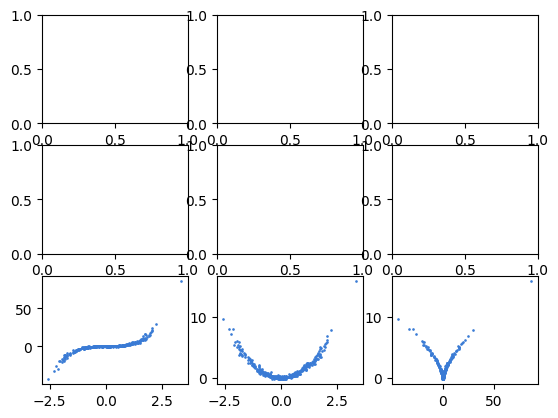

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)
ax8 = fig.add_subplot(3, 3, 8)
ax9 = fig.add_subplot(3, 3, 9)

x3 = views[0] @ u[0]
xg3 = views[0][:,0] + views[0][:,1]
y3 = views[1] @ u[1]
yg3 = views[1][:,0] + views[1][:,1]
z3 = views[2] @ u[2]
zg3 = views[2][:,0] + views[2][:,1]

ax7.scatter(x3,y3,s=0.8,c='#3a7bd5')
#ax7.plot(xg3,yg3,linewidth=0.5,c='#3a6073')
ax8.scatter(x3,z3,s=0.8,c='#3a7bd5')
#ax8.plot(xg3,yg3,linewidth=0.5,c='#3a6073')
ax9.scatter(y3,z3,s=0.8,c='#3a7bd5')
#ax9.plot(yg1,zg1,linewidth=0.5,c='#3a6073')

In [12]:
macc = np.mean(ACC_3)
sdacc = np.std(ACC_3)
print(macc, sdacc)
ACC_list.append([macc,sdacc])

mf = np.mean(FS_3)
sdf = np.std(FS_3)
print(mf, sdf)
FS_list.append([mf,sdf])

mmcc = np.mean(MCC_3)
sdmcc = np.std(MCC_3)
print(mmcc, sdmcc)
MCC_list.append([mmcc, sdmcc])

0.9926666666666665 0.00922556833539872
0.9664835164835165 0.04168226170336305
0.9640339979497794 0.044583148679418254


In [13]:
print(ACC_list)
print(FS_list)
print(MCC_list)

[[0.9975999999999999, 0.00639583197611279], [0.9434999999999999, 0.14647515906194547], [0.9926666666666665, 0.00922556833539872]]
[[0.9890549450549452, 0.02889918516206012], [0.8933763128080017, 0.2738150324505891], [0.9664835164835165, 0.04168226170336305]]
[[0.9882629549372325, 0.030909214124223112], [0.8753058894507663, 0.323405773174309], [0.9640339979497794, 0.044583148679418254]]
